<a href="https://colab.research.google.com/github/Durdonaxon95/Machine-Learning/blob/main/Qilichova_Durdona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📋 Vazifa 2: World Countries Analysis

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [100]:
df = pd.read_csv("synthetic_countries_100.csv")
df.head()

,Country,Population,GDP_billion_USD,GDP_per_capita_USD,Area_km2,Urban_population_pct,Literacy_rate_pct,Infant_mortality_per1000,Life_expectancy_years,CO2_tons_per_capita
0,Country_1,7100868,30.987,4363.79,1655723,41.3,51.4,78.18,47.43,0.254
1,Country_2,923205730,2738.427,2966.22,60081,20.4,43.1,82.26,45.25,0.030
2,Country_3,145482913,637.857,4384.41,139582,34.7,53.5,76.76,50.26,0.367
3,Country_4,47163203,25.851,548.11,53561,10.3,30.0,119.58,45.00,0.010
4,Country_5,1120868,3.599,3211.13,1834,19.7,49.3,89.80,48.26,0.010


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   100 non-null    object 
 1   Population                100 non-null    int64  
 2   GDP_billion_USD           100 non-null    float64
 3   GDP_per_capita_USD        100 non-null    float64
 4   Area_km2                  100 non-null    int64  
 5   Urban_population_pct      100 non-null    float64
 6   Literacy_rate_pct         100 non-null    float64
 7   Infant_mortality_per1000  100 non-null    float64
 8   Life_expectancy_years     100 non-null    float64
 9   CO2_tons_per_capita       100 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 7.9+ KB


In [102]:
df.describe()

,Population,GDP_billion_USD,GDP_per_capita_USD,Area_km2,Urban_population_pct,Literacy_rate_pct,Infant_mortality_per1000,Life_expectancy_years,CO2_tons_per_capita
count,1.000000e+02,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.00000,100.000000,100.000000
mean,1.504528e+08,797.335280,6181.551500,1.661579e+06,30.248000,51.243000,81.13580,49.659700,0.398190
std,2.837020e+08,1926.668842,7302.545636,3.345819e+06,12.567012,16.079099,16.61416,4.983483,0.508818
min,3.143270e+05,0.701000,548.110000,2.380000e+02,10.000000,30.000000,44.28000,45.000000,0.010000
25%,1.535784e+06,7.060500,1976.212500,5.493250e+03,20.225000,39.050000,69.74500,45.000000,0.010000
50%,1.517303e+07,41.285500,4323.830000,9.828250e+04,30.000000,50.750000,78.62000,48.255000,0.101000
75%,1.433039e+08,585.220000,6489.155000,1.350871e+06,37.825000,61.125000,92.44000,52.545000,0.740500
max,1.253188e+09,11381.753000,46971.290000,1.518519e+07,68.900000,100.000000,120.00000,66.890000,2.211000


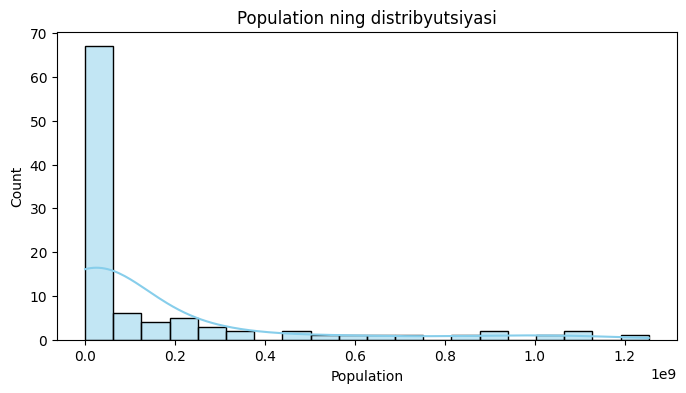

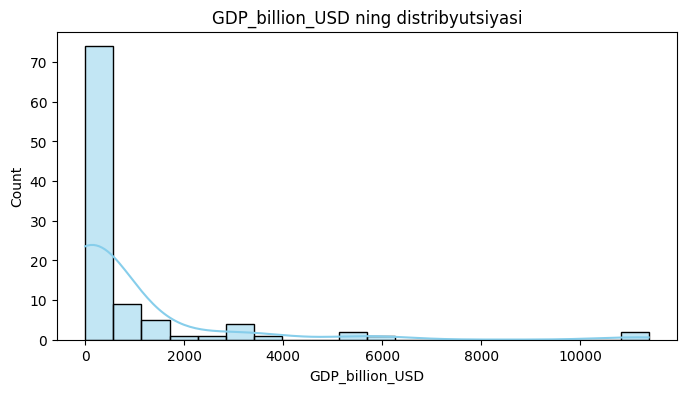

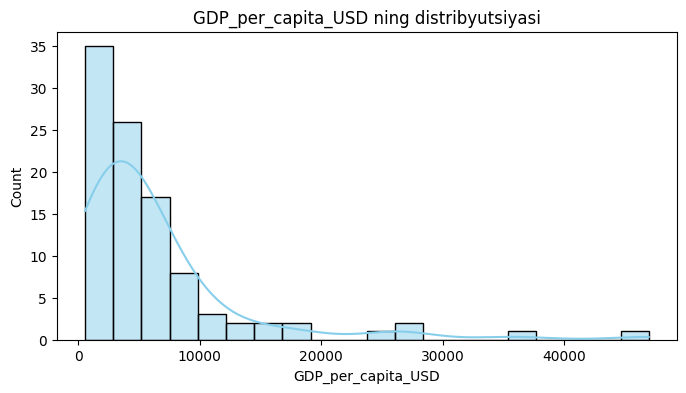

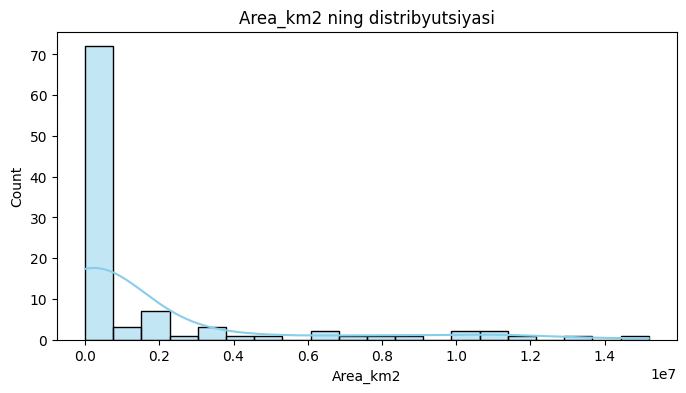

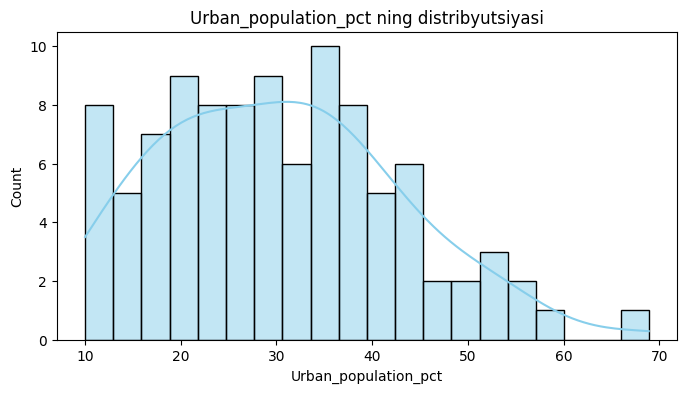

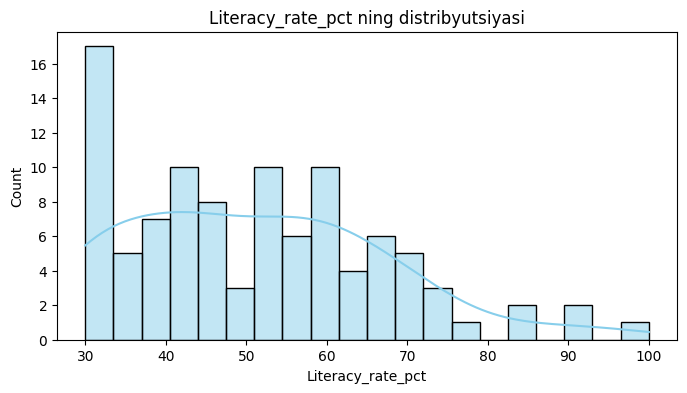

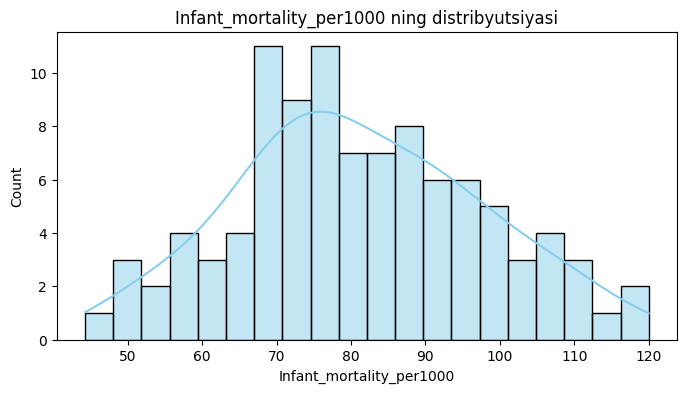

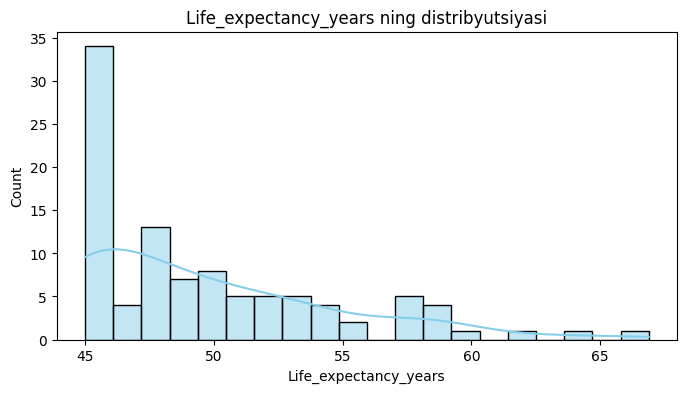

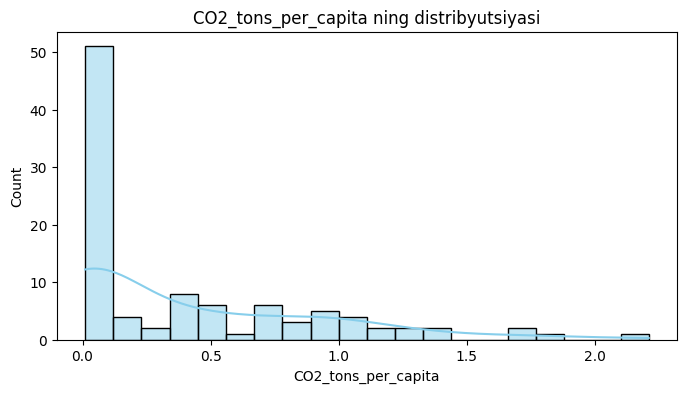

===== Korrelyatsiya matritsasi =====
                          Population  GDP_billion_USD  GDP_per_capita_USD  \
Population                  1.000000         0.714287           -0.064697   
GDP_billion_USD             0.714287         1.000000            0.238361   
GDP_per_capita_USD         -0.064697         0.238361            1.000000   
Area_km2                    0.086244         0.011690           -0.039512   
Urban_population_pct       -0.081170         0.167817            0.716633   
Literacy_rate_pct          -0.046977         0.296640            0.821008   
Infant_mortality_per1000    0.013718        -0.304191           -0.759003   
Life_expectancy_years      -0.123663         0.206449            0.809371   
CO2_tons_per_capita        -0.006204         0.188289            0.609099   

                          Area_km2  Urban_population_pct  Literacy_rate_pct  \
Population                0.086244             -0.081170          -0.046977   
GDP_billion_USD           0.011690

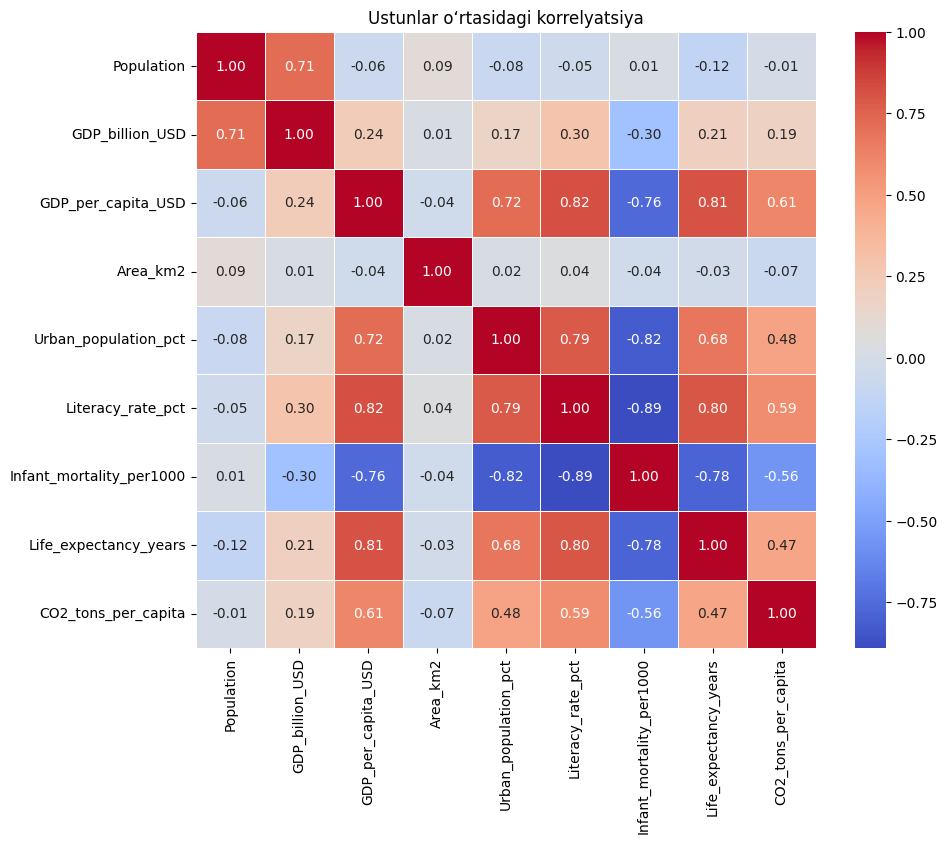

In [103]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f"{col} ning distribyutsiyasi")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# Korrelyatsiya matritsasi
corr = df[numeric_cols].corr()
print("===== Korrelyatsiya matritsasi =====")
print(corr)

# Korrelyatsiyani heatmap bilan vizualizatsiya
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Ustunlar o‘rtasidagi korrelyatsiya")
plt.show()

In [104]:
features = ['GDP_per_capita_USD', 'Life_expectancy_years',
            'Infant_mortality_per1000', 'CO2_tons_per_capita',
            'Urban_population_pct', 'Literacy_rate_pct']

X = df[features]


In [105]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

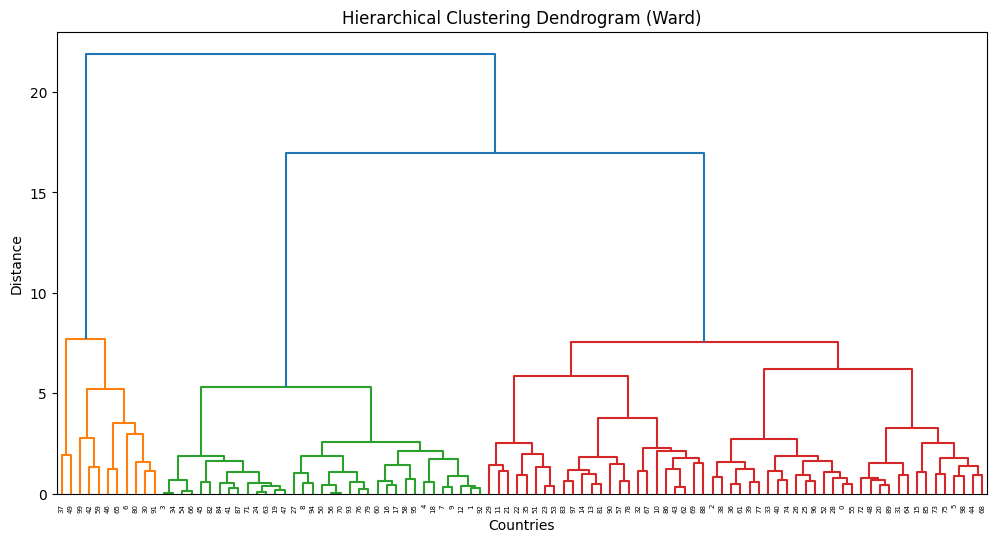

In [106]:
plt.figure(figsize=(12, 6))
dend = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Hierarchical Clustering Dendrogram (Ward)")
plt.xlabel("Countries")
plt.ylabel("Distance")
plt.show()

In [109]:
for k in range(2, 10):
    hc = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    labels = hc.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"Klasterlar soni = {k}, Silhouette Score = {score:.3f}")

Klasterlar soni = 2, Silhouette Score = 0.515
Klasterlar soni = 3, Silhouette Score = 0.367
Klasterlar soni = 4, Silhouette Score = 0.358
Klasterlar soni = 5, Silhouette Score = 0.304
Klasterlar soni = 6, Silhouette Score = 0.251
Klasterlar soni = 7, Silhouette Score = 0.262
Klasterlar soni = 8, Silhouette Score = 0.235
Klasterlar soni = 9, Silhouette Score = 0.244


In [110]:
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X_scaled)

df['Cluster_Ward'] = y_hc

In [113]:
linkage_methods = ['single', 'complete', 'average', 'ward']
scores = {}

for method in linkage_methods:
    hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage=method)
    labels = hc.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    scores[method] = score
    print(f"Linkage: {method}, Silhouette Score: {score:.3f}")

# Eng yaxshi metod
best_method = max(scores, key=scores.get)
print(f"\nEng yaxshi linkage metodi: {best_method} (Silhouette Score = {scores[best_method]:.3f})")

Linkage: single, Silhouette Score: 0.247
Linkage: complete, Silhouette Score: 0.624
Linkage: average, Silhouette Score: 0.624
Linkage: ward, Silhouette Score: 0.515

Eng yaxshi linkage metodi: complete (Silhouette Score = 0.624)


In [114]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.75967673 0.10206872]


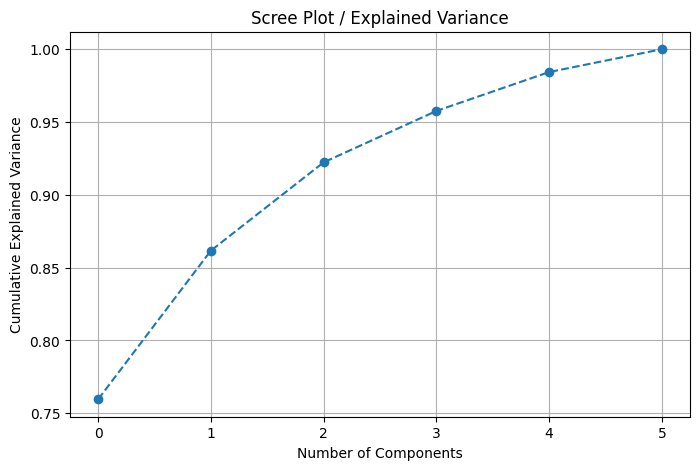

In [115]:
pca_full = PCA().fit(X_scaled)
explained_variance = pca_full.explained_variance_ratio_

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot / Explained Variance")
plt.grid(True)
plt.show()

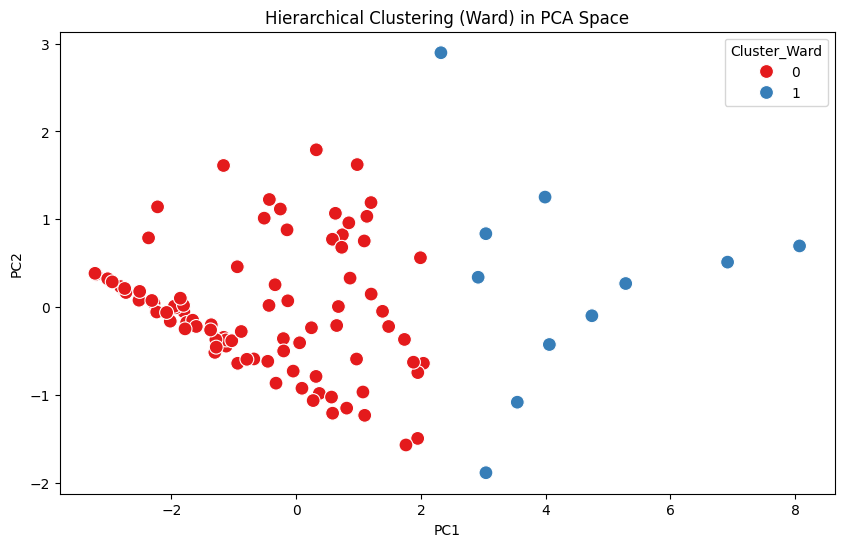

In [116]:
# Clustering vizualizatsiya

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster_Ward'], palette='Set1', s=100)
plt.title("Hierarchical Clustering (Ward) in PCA Space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [117]:
def classify_country(row):
    if row['GDP_per_capita_USD'] > 30000 and row['Life_expectancy_years'] > 75:
        return 'Developed'
    elif row['GDP_per_capita_USD'] > 10000:
        return 'Developing'
    else:
        return 'Underdeveloped'

df['Development_Status'] = df.apply(classify_country, axis=1)


In [118]:
group_stats = df.groupby('Development_Status')[features].mean()
print(group_stats)


                    GDP_per_capita_USD  Life_expectancy_years  \
Development_Status                                              
Developing                21179.902308              58.657692   
Underdeveloped             3940.418621              48.315172   

                    Infant_mortality_per1000  CO2_tons_per_capita  \
Development_Status                                                  
Developing                         55.218462             0.969154   
Underdeveloped                     85.008506             0.312874   

                    Urban_population_pct  Literacy_rate_pct  
Development_Status                                           
Developing                     47.784615          77.438462  
Underdeveloped                 27.627586          47.328736  


Xulosa:


Developing mamlakatlar iqtisodiy jihatdan yuqoriroq, lekin sog'liq, savodxonlik va urbanizatsiyada jiddiy kamchiliklar mavjud.

Underdeveloped mamlakatlar esa deyarli barcha ko'rsatkichlarda orqada qolgan.

Izoh: Datasetni internet qidiruv orqali topa olmadim. Shuning uchun dataset sun'iy intelekt orqali yaratilgan.